In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

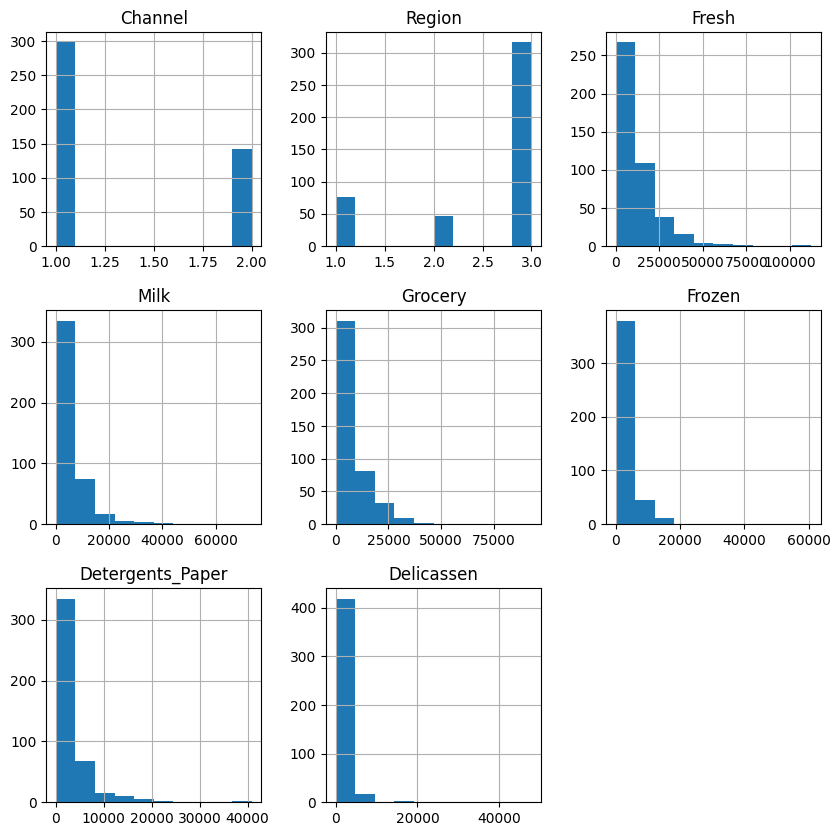

In [4]:
df.hist(figsize=(10,10))

In [5]:
scaler = StandardScaler()
scaled_value = pd.DataFrame(scaler.fit_transform(df))
scaled_value

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

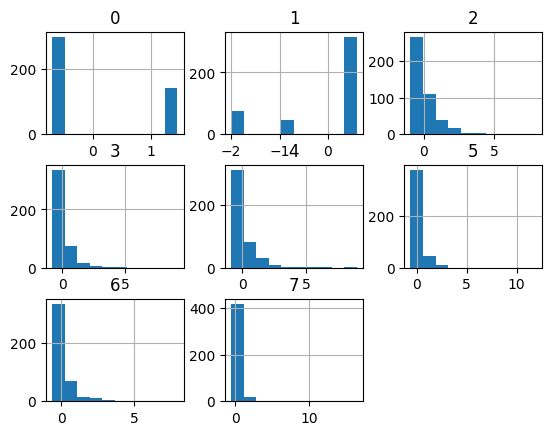

In [6]:
scaled_value.hist()

In [7]:
pd.DataFrame(scaler.inverse_transform(scaled_value))

,0,1,2,3,4,5,6,7
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0
...,...,...,...,...,...,...,...,...
435,1.0,3.0,29703.0,12051.0,16027.0,13135.0,182.0,2204.0
436,1.0,3.0,39228.0,1431.0,764.0,4510.0,93.0,2346.0
437,2.0,3.0,14531.0,15488.0,30243.0,437.0,14841.0,1867.0
438,1.0,3.0,10290.0,1981.0,2232.0,1038.0,168.0,2125.0


In [8]:
inertia_arr = []
k = np.arange(20)
def optimize_k():
  for i in range(1,20) :
    cluster_model = KMeans(n_clusters = k[i] , init = 'k-means++' , verbose=1, )
    cluster_model.fit(scaled_value)
    inertia_arr.append(cluster_model.inertia_)
    print('printing inertia ', cluster_model.inertia_)


In [9]:
optimize_k()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 4687.951020441442.
Iteration 1, inertia 3520.000000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7094.302790245061.
Iteration 1, inertia 3520.000000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4767.968093063639.
Iteration 1, inertia 3520.000000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4716.211132381526.
Iteration 1, inertia 3520.000000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4854.514374457588.
Iteration 1, inertia 3520.000000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5106.827292729486.
Iteration 1, inertia 3520.000000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4846.348278908681.
Iteration 1, inertia 3520.0000000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 5, inertia 2600.493402341515.
Iteration 6, inertia 2599.3873849123092.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 4193.157209599484.
Iteration 1, inertia 2739.8835831951083.
Iteration 2, inertia 2647.630090185414.
Iteration 3, inertia 2616.0331094607573.
Iteration 4, inertia 2601.973737212931.
Iteration 5, inertia 2599.3873849123092.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3164.4707390212334.
Iteration 1, inertia 2681.3410962025764.
Iteration 2, inertia 2647.5966153626287.
Iteration 3, inertia 2627.23566018563.
Iteration 4, inertia 2608.5969005954303.
Iteration 5, inertia 2599.838223277641.
Iteration 6, inertia 2599.3873849123092.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 4123.403163923679.
Iteration 1, inertia 3148.2537801766257.
Iteration 2, inertia 3078.843770225937.
Iteration 3, inertia 2956.7265705403697.
Iteration 4, inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 2811.92222849928.
Iteration 1, inertia 2258.0866697832435.
Iteration 2, inertia 2233.1651798539433.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3751.643970073527.
Iteration 1, inertia 2503.187196723524.
Iteration 2, inertia 2382.9679507732576.
Iteration 3, inertia 2226.5845792810424.
Iteration 4, inertia 2176.4914143930555.
Iteration 5, inertia 2162.0362297334905.
Iteration 6, inertia 2149.283956221758.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3139.3952101865666.
Iteration 1, inertia 2337.84334102935.
Iteration 2, inertia 2303.2615285456604.
Iteration 3, inertia 2301.141776086308.
Iteration 4, inertia 2299.940439805417.
Iteration 5, inertia 2295.2929621377525.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3396.004518853303.
Iteration 1, inertia 2711.12127935622.
Iteration 2, inertia 2592.6637465269796.
Iteration 3, inertia 23

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 2924.8757491432825.
Iteration 1, inertia 2181.7567249240424.
Iteration 2, inertia 2120.9516177175583.
Iteration 3, inertia 2088.540410822915.
Iteration 4, inertia 2025.5144904068725.
Iteration 5, inertia 1958.10913665423.
Iteration 6, inertia 1922.673509811203.
Iteration 7, inertia 1893.710327220403.
Iteration 8, inertia 1880.2568682539204.
Iteration 9, inertia 1866.2033794162721.
Iteration 10, inertia 1853.4445042729994.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2830.417213974706.
Iteration 1, inertia 2261.2310520595856.
Iteration 2, inertia 2213.1759446325095.
Iteration 3, inertia 2187.838324698675.
Iteration 4, inertia 2168.362732089751.
Iteration 5, inertia 2160.2073463430293.
Iteration 6, inertia 2152.2827845132806.
Iteration 7, inertia 2148.7720367857246.
Iteration 8, inertia 2144.292875580817.
Iteration 9, inertia 2136.9340693337467.
Iteration 10, inertia 2133.5955069524516.
Iteration 11, inertia 2126.8268778

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 8, inertia 1620.7481161235746.
Iteration 9, inertia 1606.656749351738.
Iteration 10, inertia 1598.4974595514268.
Iteration 11, inertia 1589.3059278977855.
Iteration 12, inertia 1580.0916498081754.
Iteration 13, inertia 1575.2842487996436.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 2279.7661635638938.
Iteration 1, inertia 1824.9668563526589.
Iteration 2, inertia 1759.2705110755173.
Iteration 3, inertia 1626.8760209508027.
Iteration 4, inertia 1616.282712818821.
Iteration 5, inertia 1616.1638282984748.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2190.156419378617.
Iteration 1, inertia 1634.5887995723926.
Iteration 2, inertia 1608.9466489979814.
Iteration 3, inertia 1590.5696360684824.
Iteration 4, inertia 1583.5079682418418.
Iteration 5, inertia 1575.6431596880311.
Iteration 6, inertia 1570.140853699381.
Iteration 7, inertia 1567.1534422426116.
Iteration 8, inertia 1563.3959669102737

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 1978.0796390413504.
Iteration 1, inertia 1547.5927636239444.
Iteration 2, inertia 1459.6081797060738.
Iteration 3, inertia 1372.657753569622.
Iteration 4, inertia 1336.7474343694375.
Iteration 5, inertia 1323.3117055604885.
Iteration 6, inertia 1316.8539985942057.
Iteration 7, inertia 1315.9602781009337.
Iteration 8, inertia 1315.7930682175252.
Iteration 9, inertia 1315.043909905623.
Iteration 10, inertia 1314.7453710153159.
Iteration 11, inertia 1314.6800280812552.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1716.8862458240433.
Iteration 1, inertia 1369.1643262564412.
Iteration 2, inertia 1332.230683331566.
Iteration 3, inertia 1329.0947716350138.
Iteration 4, inertia 1328.838064292147.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2039.6859051951087.
Iteration 1, inertia 1730.9647397611857.
Iteration 2, inertia 1726.3691053726832.
Iteration 3, inertia 1725.6571708207405.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 1736.218240507037.
Iteration 1, inertia 1270.0410652388273.
Iteration 2, inertia 1219.244849560297.
Iteration 3, inertia 1204.2271690410578.
Iteration 4, inertia 1198.12966857932.
Iteration 5, inertia 1196.5323731273475.
Iteration 6, inertia 1195.627679523785.
Iteration 7, inertia 1194.9893757478096.
Iteration 8, inertia 1194.7947378339763.
Iteration 9, inertia 1194.5759225546387.
Iteration 10, inertia 1194.4941751104004.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 1548.0600036713774.
Iteration 1, inertia 1260.9336308378897.
Iteration 2, inertia 1225.4557421127274.
Iteration 3, inertia 1208.6153293063016.
Iteration 4, inertia 1207.2334144575057.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1729.7402009560724.
Iteration 1, inertia 1298.0947226068602.
Iteration 2, inertia 1225.5815658388774.
Iteration 3, inertia 1208.482515570941.
Iteration 4, inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4, inertia 1155.1012592581556.
Iteration 5, inertia 1149.8517118014418.
Iteration 6, inertia 1146.9011336837877.
Iteration 7, inertia 1144.0336883035775.
Iteration 8, inertia 1139.6997503704788.
Iteration 9, inertia 1137.8695225497117.
Iteration 10, inertia 1137.7769319779043.
Iteration 11, inertia 1137.5546320692924.
Iteration 12, inertia 1137.4084113550296.
Iteration 13, inertia 1137.2077109337974.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1739.054559690925.
Iteration 1, inertia 1353.707560144111.
Iteration 2, inertia 1249.9192633819675.
Iteration 3, inertia 1170.243702803124.
Iteration 4, inertia 1149.7913775992863.
Iteration 5, inertia 1147.9143163667518.
Iteration 6, inertia 1147.7600903550704.
Iteration 7, inertia 1147.5255865125464.
Iteration 8, inertia 1147.442521339187.
Iteration 9, inertia 1147.3561445600526.
Iteration 10, inertia 1146.8739098878511.
Converged at iteration 10: strict convergence.
Initialization compl

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1, inertia 1043.3021772179475.
Iteration 2, inertia 1033.5066248852079.
Iteration 3, inertia 1031.7219933357053.
Iteration 4, inertia 1019.1750174652141.
Iteration 5, inertia 1018.6564705120355.
Iteration 6, inertia 1018.2325482898871.
Iteration 7, inertia 1018.1765922360071.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1497.8667484919538.
Iteration 1, inertia 1180.5503970604902.
Iteration 2, inertia 1137.7021628826433.
Iteration 3, inertia 1115.9742263442593.
Iteration 4, inertia 1109.100611022257.
Iteration 5, inertia 1108.2113431562989.
Iteration 6, inertia 1107.3761155818997.
Iteration 7, inertia 1106.1255389920373.
Iteration 8, inertia 1105.899898983463.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 1427.5725766173596.
Iteration 1, inertia 1120.1781520376865.
Iteration 2, inertia 1092.3438183522435.
Iteration 3, inertia 1081.663307042234.
Iteration 4, inertia 1078.202086287794.
Ite

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 1189.1680921371299.
Iteration 1, inertia 961.195897528753.
Iteration 2, inertia 953.2721026988665.
Iteration 3, inertia 949.1300208388841.
Iteration 4, inertia 947.2003826089416.
Iteration 5, inertia 947.0487240591993.
Iteration 6, inertia 946.9268226639617.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1408.8586954598873.
Iteration 1, inertia 1032.8987611247462.
Iteration 2, inertia 992.1471259523644.
Iteration 3, inertia 971.3275224929812.
Iteration 4, inertia 959.8082123933214.
Iteration 5, inertia 956.7816215980656.
Iteration 6, inertia 955.1122133185524.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1426.4150770114113.
Iteration 1, inertia 1053.7291229682844.
Iteration 2, inertia 983.9423082314856.
Iteration 3, inertia 969.5847586650846.
Iteration 4, inertia 956.3595081599465.
Iteration 5, inertia 946.6385640586213.
Iteration 6, inertia 938.9253821

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Iteration 14, inertia 922.4197926981733.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 1290.0239736243661.
Iteration 1, inertia 940.1018739304466.
Iteration 2, inertia 925.4958320072328.
Iteration 3, inertia 904.3459124613174.
Iteration 4, inertia 890.6761924024471.
Iteration 5, inertia 874.39242892535.
Iteration 6, inertia 866.460136498378.
Iteration 7, inertia 862.755879370673.
Iteration 8, inertia 860.2180550974167.
Iteration 9, inertia 856.294750072821.
Iteration 10, inertia 855.2534636498069.
Iteration 11, inertia 855.1930195520251.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1217.6058790406883.
Iteration 1, inertia 975.2577341125422.
Iteration 2, inertia 957.244991251364.
Iteration 3, inertia 942.1173607420947.
Iteration 4, inertia 937.7129086595851.
Iteration 5, inertia 937.4781079921293.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1228.18

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 8, inertia 876.9355021106469.
Iteration 9, inertia 876.372313005138.
Iteration 10, inertia 875.4967622572158.
Iteration 11, inertia 873.3965672124126.
Iteration 12, inertia 867.4382197455747.
Iteration 13, inertia 863.5030526745327.
Iteration 14, inertia 862.1101114561895.
Iteration 15, inertia 861.7061613453848.
Iteration 16, inertia 861.4559213736202.
Iteration 17, inertia 861.1521269089761.
Iteration 18, inertia 860.7259438129568.
Iteration 19, inertia 860.6996152365757.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1071.9020091944067.
Iteration 1, inertia 893.3876227563362.
Iteration 2, inertia 883.6370657937302.
Iteration 3, inertia 878.4255112831113.
Iteration 4, inertia 871.8339046895289.
Iteration 5, inertia 864.9124537160656.
Iteration 6, inertia 856.7333570013838.
Iteration 7, inertia 849.6180826749794.
Iteration 8, inertia 843.6551267639352.
Iteration 9, inertia 842.0367821540162.
Iteration 10, inertia 841.4350402858928

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 1081.1523525356238.
Iteration 1, inertia 877.4884153694184.
Iteration 2, inertia 853.1943810882162.
Iteration 3, inertia 827.0083050964608.
Iteration 4, inertia 792.7993137707617.
Iteration 5, inertia 767.1568980389754.
Iteration 6, inertia 763.6875381782827.
Iteration 7, inertia 763.0224454666361.
Iteration 8, inertia 762.8522827849931.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 1013.9572827269403.
Iteration 1, inertia 820.1316791261423.
Iteration 2, inertia 810.5375534544737.
Iteration 3, inertia 801.9767248772769.
Iteration 4, inertia 793.7437684485967.
Iteration 5, inertia 788.7793248970452.
Iteration 6, inertia 788.6334138970665.
Iteration 7, inertia 788.5538149033914.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1119.7434240031184.
Iteration 1, inertia 840.4352598734176.
Iteration 2, inertia 825.4398846911905.
Iteration 3, inertia 819.53608271

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4, inertia 780.9178779381152.
Iteration 5, inertia 779.1935247340319.
Iteration 6, inertia 778.5728142109695.
Iteration 7, inertia 778.4012857038192.
Iteration 8, inertia 778.3404099405197.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 1153.7513677802012.
Iteration 1, inertia 807.2338615481812.
Iteration 2, inertia 783.0809909072848.
Iteration 3, inertia 769.8499912082686.
Iteration 4, inertia 768.7864926729221.
Iteration 5, inertia 767.9013545150996.
Iteration 6, inertia 766.2288197791571.
Iteration 7, inertia 765.8632376712383.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1004.505881004483.
Iteration 1, inertia 823.3228312109178.
Iteration 2, inertia 802.258131108249.
Iteration 3, inertia 797.1604915264696.
Iteration 4, inertia 796.1946529806582.
Iteration 5, inertia 795.9762639041961.
Iteration 6, inertia 795.778254934806.
Converged at iteration 6: strict convergence.
Initialization 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Iteration 0, inertia 1002.4009840302338.
Iteration 1, inertia 742.6162970737073.
Iteration 2, inertia 729.8657364496569.
Iteration 3, inertia 726.2097119735736.
Iteration 4, inertia 725.3176251597133.
Iteration 5, inertia 724.9536569670902.
Iteration 6, inertia 724.8301146958242.
Iteration 7, inertia 724.7827201369562.
Iteration 8, inertia 724.3352977127523.
Iteration 9, inertia 722.9085941960957.
Iteration 10, inertia 720.00603733766.
Iteration 11, inertia 715.863404018249.
Iteration 12, inertia 707.1625573078336.
Iteration 13, inertia 704.5207724909815.
Iteration 14, inertia 703.8336173321281.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 980.3052746535551.
Iteration 1, inertia 744.3408417263229.
Iteration 2, inertia 725.412226508972.
Iteration 3, inertia 716.9205839004649.
Iteration 4, inertia 714.3696556690898.
Iteration 5, inertia 713.4347718805307.
Iteration 6, inertia 708.6094540974049.
Iteration 7, inertia 706.22037454011.
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 954.078450658025.
Iteration 1, inertia 731.0268033782323.
Iteration 2, inertia 701.5707158221603.
Iteration 3, inertia 694.5885589683858.
Iteration 4, inertia 690.707979051778.
Iteration 5, inertia 689.67341241649.
Iteration 6, inertia 689.4375374357023.
Iteration 7, inertia 688.8213139576146.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 954.1348400638254.
Iteration 1, inertia 758.0292427930685.
Iteration 2, inertia 722.2705743216948.
Iteration 3, inertia 709.5347219403013.
Iteration 4, inertia 697.6353366891756.
Iteration 5, inertia 689.6296728368902.
Iteration 6, inertia 687.2474450432702.
Iteration 7, inertia 686.2216659962996.
Iteration 8, inertia 685.4644699035118.
Iteration 9, inertia 684.2777762960084.
Iteration 10, inertia 683.4047575955228.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 919.2567815027637.
Iteration 1, inertia 744.8390865966924

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Iteration 1, inertia 689.1906681693167.
Iteration 2, inertia 669.8419692987416.
Iteration 3, inertia 657.6525637654732.
Iteration 4, inertia 649.8708374955816.
Iteration 5, inertia 648.6385003853502.
Iteration 6, inertia 648.3319300487982.
Iteration 7, inertia 648.1122696557009.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 870.7461471747763.
Iteration 1, inertia 683.7133818079672.
Iteration 2, inertia 673.5615258250186.
Iteration 3, inertia 665.9190915198303.
Iteration 4, inertia 664.1697851129944.
Iteration 5, inertia 663.9394611848097.
Iteration 6, inertia 663.7518280684149.
Iteration 7, inertia 663.6192863664583.
Iteration 8, inertia 663.5616062200716.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 839.1705699194206.
Iteration 1, inertia 694.1492537487131.
Iteration 2, inertia 675.9209690741354.
Iteration 3, inertia 663.0873831961451.
Iteration 4, inertia 657.5465999645038.
Iteration 5, inerti

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 2, inertia 644.1519409765907.
Iteration 3, inertia 640.7622235008885.
Iteration 4, inertia 636.8993354021271.
Iteration 5, inertia 635.6299138605289.
Iteration 6, inertia 635.1162425371974.
Iteration 7, inertia 634.7116585095746.
Iteration 8, inertia 634.5114711306169.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 861.9730940604256.
Iteration 1, inertia 657.7173677339414.
Iteration 2, inertia 644.4595732304957.
Iteration 3, inertia 636.8405713046934.
Iteration 4, inertia 634.3787564857876.
Iteration 5, inertia 633.7885278129861.
Iteration 6, inertia 632.9488122628229.
Iteration 7, inertia 632.2201500361111.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 852.9116160101066.
Iteration 1, inertia 654.7683716140505.
Iteration 2, inertia 631.1875941572632.
Iteration 3, inertia 622.7085011464615.
Iteration 4, inertia 621.2962489950362.
Iteration 5, inertia 619.6510450252251.
Iteration 6, inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Iteration 9, inertia 588.9915601274063.
Iteration 10, inertia 587.72626199621.
Iteration 11, inertia 587.2471516470981.
Iteration 12, inertia 587.0033148699238.
Iteration 13, inertia 586.6678940969948.
Iteration 14, inertia 586.3223951128198.
Iteration 15, inertia 586.0135325000706.
Iteration 16, inertia 585.9450851690679.
Iteration 17, inertia 585.890349462049.
Iteration 18, inertia 585.8392009278346.
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 801.611225763409.
Iteration 1, inertia 621.1580043906088.
Iteration 2, inertia 597.4402406787251.
Iteration 3, inertia 589.1666781272146.
Iteration 4, inertia 584.982061314321.
Iteration 5, inertia 582.81491275038.
Iteration 6, inertia 582.2887473213664.
Iteration 7, inertia 582.2707426117656.
Iteration 8, inertia 582.252994782749.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 778.8032799302749.
Iteration 1, inertia 624.4579692281252.
Iteration 2, iner

In [10]:
inertia_arr

[3520.000000000001,
 2599.3873849123092,
 2147.6785841630854,
 1847.399350736819,
 1541.5302652871262,
 1313.9619874240163,
 1191.2265329344218,
 1065.5864933846974,
 985.3324627018089,
 919.1071190159867,
 851.7139254884614,
 803.4363642141176,
 758.878752797478,
 716.5901997035444,
 682.9205461781743,
 659.9482485118032,
 637.5109100704162,
 601.2875545854175,
 582.252994782749]

([<matplotlib.axis.XTick at 0x7b65a88e7460>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

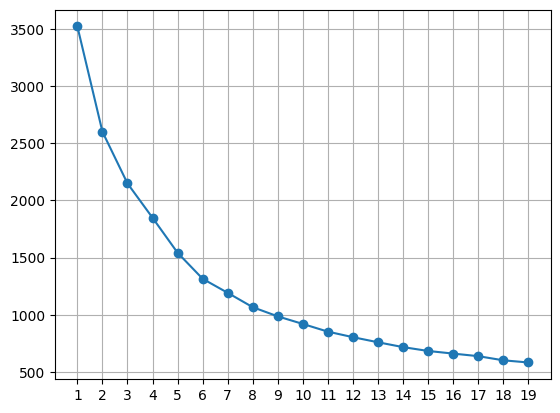

In [11]:
plt.plot(k[1:], inertia_arr,marker = 'o')
plt.grid()
plt.xticks(k[1:])

In [12]:
cluster_model = KMeans(n_clusters = 5 , init = 'k-means++' , verbose=1, )

In [13]:
cluster_model.fit(scaled_value)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 2054.7741693491535.
Iteration 1, inertia 1704.9751509212524.
Iteration 2, inertia 1663.2012632975448.
Iteration 3, inertia 1620.1768706330304.
Iteration 4, inertia 1593.9565253482529.
Iteration 5, inertia 1577.9287078098473.
Iteration 6, inertia 1569.1904952877858.
Iteration 7, inertia 1560.3099747164097.
Iteration 8, inertia 1548.4491441164682.
Iteration 9, inertia 1543.0226956293666.
Iteration 10, inertia 1541.3036147610628.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2092.0847998982817.
Iteration 1, inertia 1706.7190301291973.
Iteration 2, inertia 1656.3969570936645.
Iteration 3, inertia 1629.2126206811902.
Iteration 4, inertia 1618.9109044577083.
Iteration 5, inertia 1603.239711234915.
Iteration 6, inertia 1596.4252714949744.
Iteration 7, inertia 1592.6272553083436.
Iteration 8, inertia 1582.5469991044538.
Iteration 9, inertia 1578.6507540076059.
Iteration 10, inertia 1576.3903125571746.
It

KMeans(n_clusters=5, verbose=1)

In [14]:
pred = cluster_model.predict(scaled_value)

In [15]:
pd.DataFrame(pred).value_counts().sort_values(ascending=False)

1    209
0    126
2     91
3     10
4      4
Name: count, dtype: int64

In [16]:
import seaborn as sns

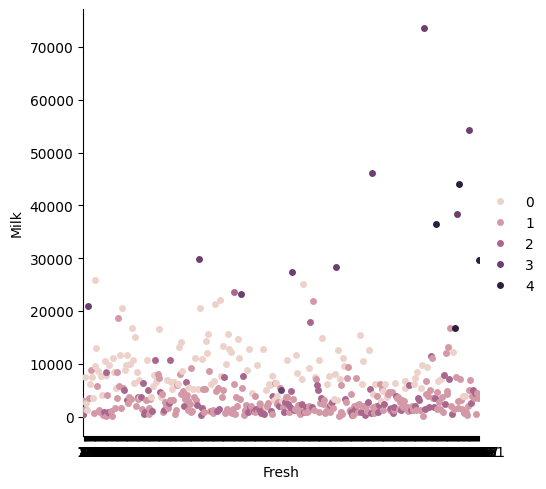

In [17]:
sns.catplot(df,x='Fresh',y='Milk',hue=pred)

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 440.

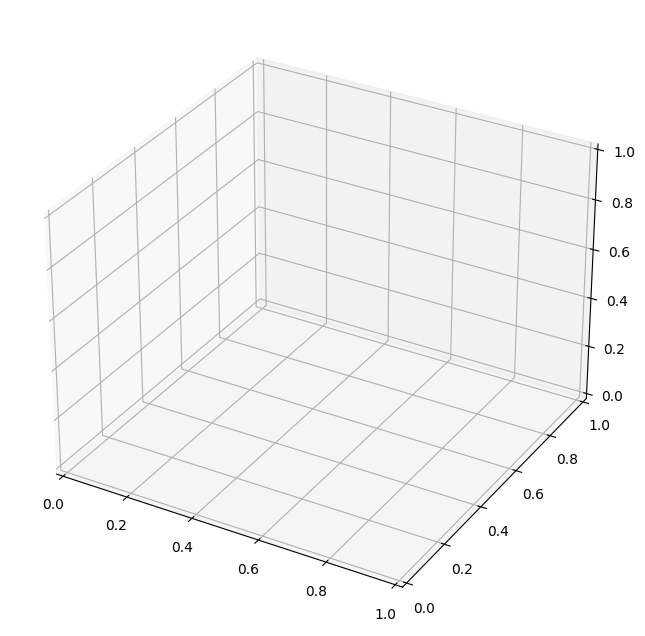

In [31]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
# ax.scatter(df['Fresh'],df['Milk'],df['Grocery'],c=('r','g','b','y','purple'))
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'purple'}
import seaborn as sns
ax.scatter(df['Fresh'],df['Milk'],df['Grocery'],c=pred,marker='o',s=100)


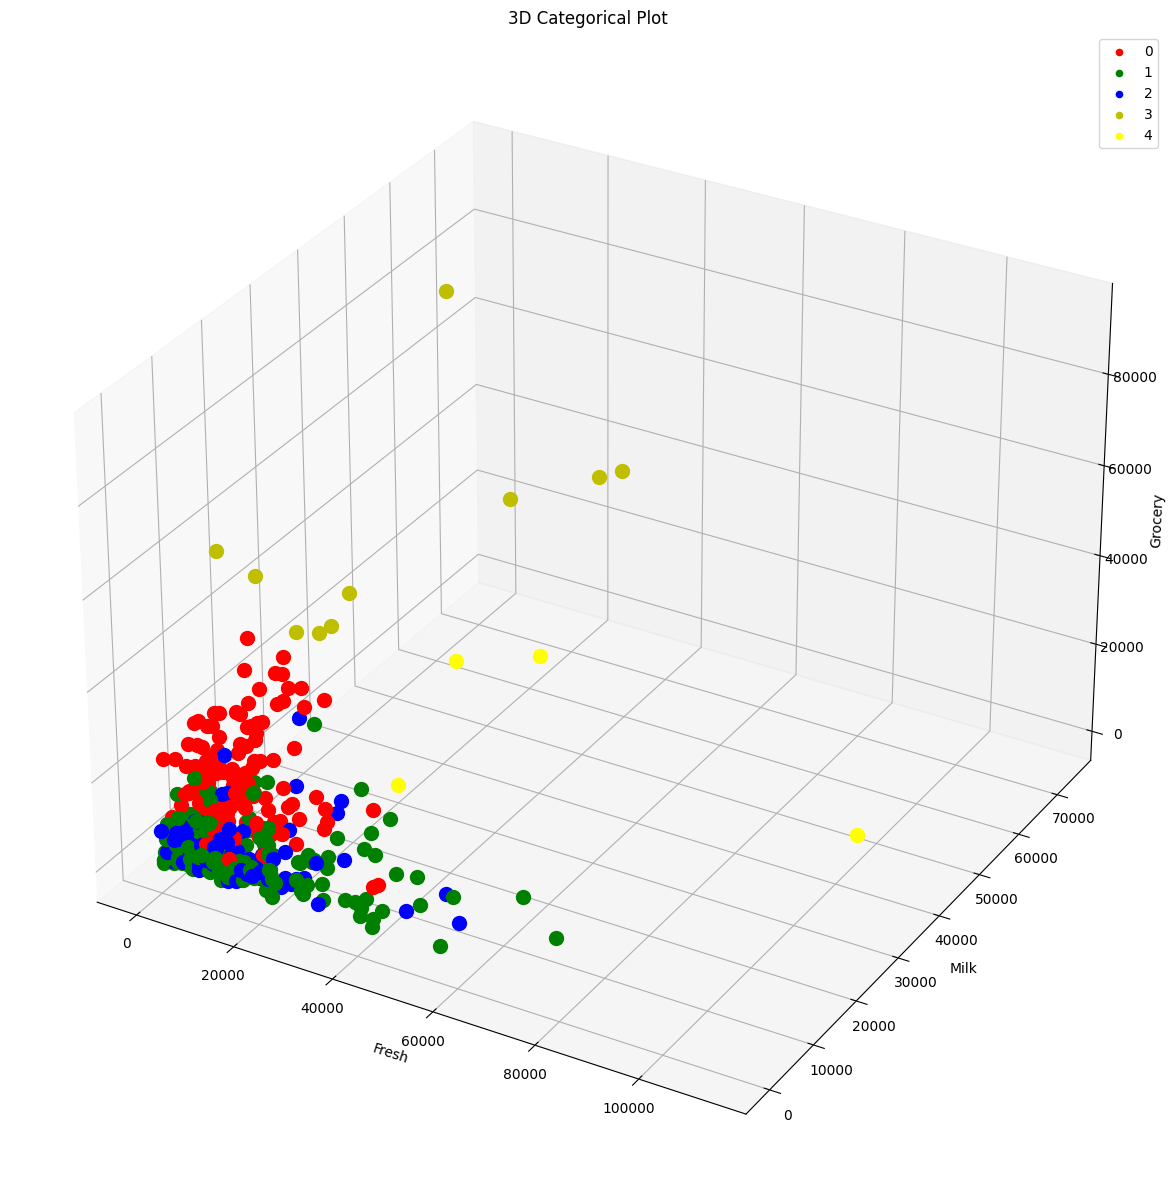

In [19]:

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(projection='3d')
color = {0:'r',1:'g',2:'b',3:'y',4:'yellow'}
for index,row in df.iterrows():
  ax1.scatter(row['Fresh'],row['Milk'],row['Grocery'],marker='o',c=color[pred[index]],s=100)

ax1.set_xlabel('Fresh')
ax1.set_ylabel('Milk')
ax1.set_zlabel('Grocery')
ax1.set_title('3D Categorical Plot')

#plotting color and corresponding bar

for pred,items in color.items():
  ax1.scatter([],[],[],color=items,label=pred)

ax1.legend()

In [20]:
# using dimensionality reduction
new_scaler = StandardScaler()
new_df = df
new_df = new_df.drop(columns=['Channel','Region'])
scaled_new_df = pd.DataFrame(new_scaler.fit_transform(new_df))

new_model = KMeans(n_clusters = 5 , init = 'k-means++' )
new_pred = new_model.fit_predict(scaled_new_df)
scaled_new_df[6] = new_pred
scaled_new_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2,3,4,5,6
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,4
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,4
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,0
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,0
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,2
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,4


In [21]:
from sklearn.decomposition import PCA
decomp = PCA(n_components = 2)
decomp_data = decomp.fit_transform(scaled_new_df)
scaled_new_df[11] = decomp_data[:,[0]]
scaled_new_df[22] = decomp_data[:,[1]]
scaled_new_df

unique = scaled_new_df[6].unique()





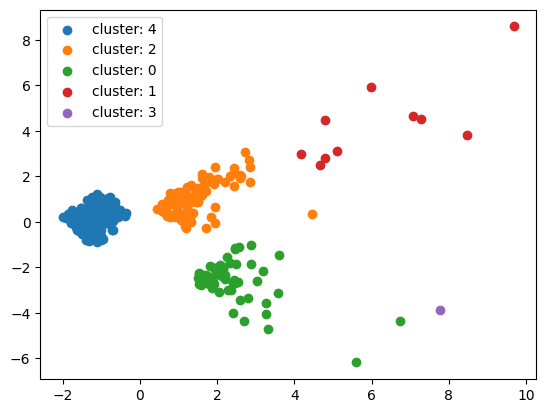

In [22]:
for i in unique:
  plt.scatter(scaled_new_df[scaled_new_df[6]==i][11],scaled_new_df[scaled_new_df[6]==i][22],label = f'cluster: {i}')
plt.legend()

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
from  sklearn.cluster import AgglomerativeClustering

In [24]:
agglo = AgglomerativeClustering()

In [25]:
iris_data = iris.data

In [26]:
iris_model = agglo.fit(iris_data)
iris_model



AgglomerativeClustering()

In [27]:
iris_model.n_clusters_

2

In [28]:
iris_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
iris_model.children_

array([[101, 142],
       [  7,  39],
       [  0,  17],
       [  9,  34],
       [128, 132],
       [ 10,  48],
       [  4,  37],
       [ 19,  21],
       [ 29,  30],
       [ 57,  93],
       [ 80,  81],
       [116, 137],
       [  8,  38],
       [  3,  47],
       [ 27,  28],
       [ 82,  92],
       [ 95,  96],
       [127, 138],
       [  1,  45],
       [ 63,  91],
       [ 65,  75],
       [ 40, 152],
       [123, 126],
       [ 49, 151],
       [112, 139],
       [ 94,  99],
       [ 12, 168],
       [ 88, 166],
       [ 66,  84],
       [ 23,  26],
       [ 53,  89],
       [ 74,  97],
       [ 25, 153],
       [ 46, 157],
       [  2, 163],
       [110, 147],
       [120, 143],
       [136, 148],
       [ 78, 169],
       [ 69, 160],
       [ 54,  58],
       [140, 144],
       [141, 145],
       [ 43, 179],
       [ 68,  87],
       [ 50,  52],
       [ 51,  56],
       [107, 130],
       [105, 122],
       [103, 161],
       [164, 171],
       [ 20,  31],
       [ 11,

In [30]:
iris_model.n_leaves_

150

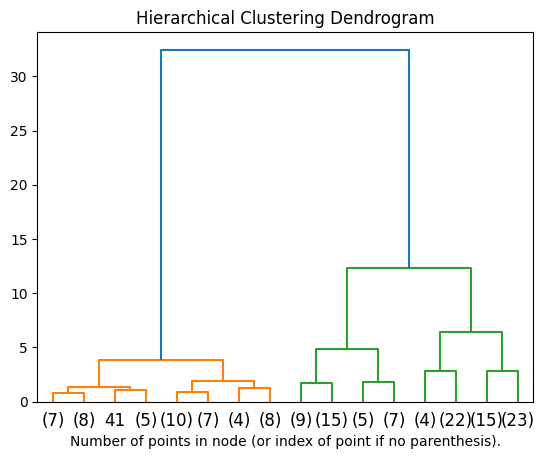

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [69]:
grid={'linkage' : ['average', 'single', 'ward', 'complete'], 'n_clusters':3}
grid_labels = []
for link in grid['linkage']:
  model2 = AgglomerativeClustering( n_clusters=3,linkage=link)
  model2.fit(X)
  grid_labels.append(model2.labels_)

In [71]:
grid_labels

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

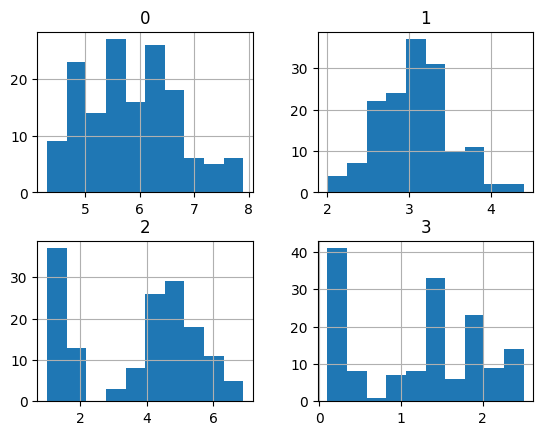

In [39]:
pd.DataFrame(X).hist()

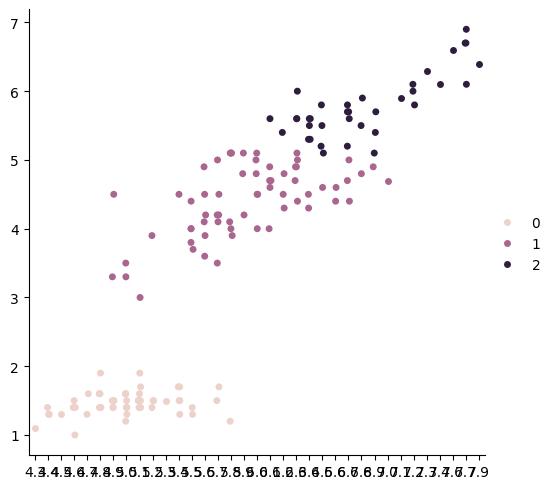

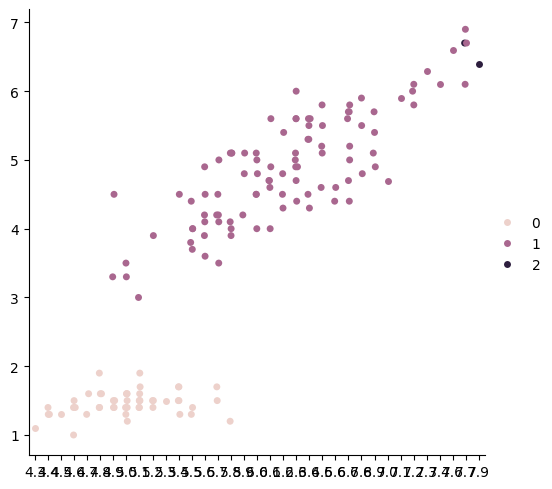

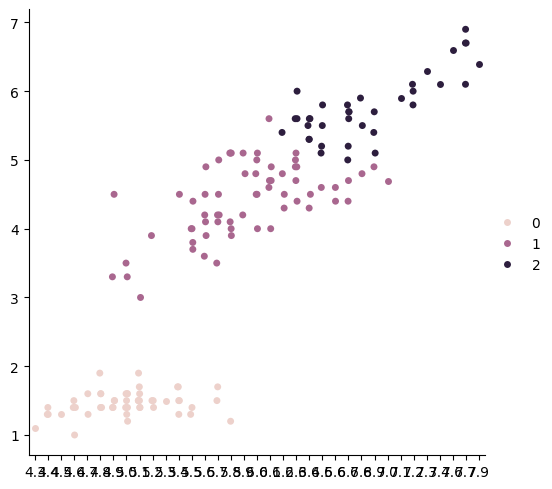

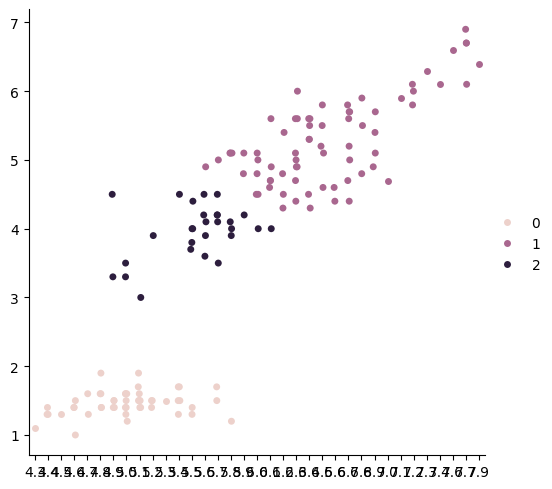

In [75]:
label_mapped = []
pred_ = np.array(pd.Series(model2.labels_).map({1:0,0:1,2:2}))
for label in grid_labels:
  x = np.array(pd.Series(label).map({1:0,0:1,2:2}))
  label_mapped.append(x)
  sns.catplot(x = X[:,0],y = X[:,2],hue=x )

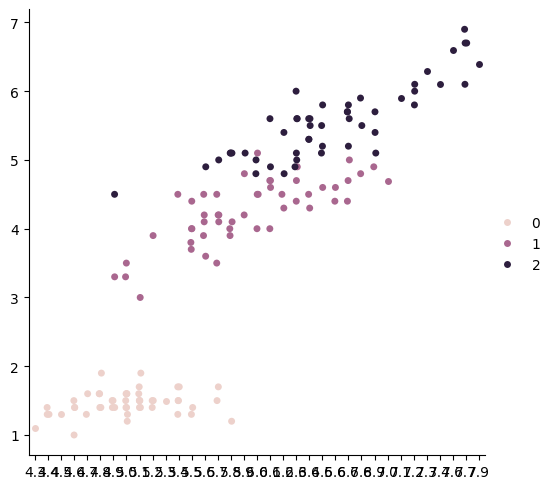

In [46]:
sns.catplot(x = X[:,0],y = X[:,2],hue=load_iris().target)

In [80]:
for data in label_mapped:
  x = load_iris().target==data
  print(x.sum()/data.shape[0])

0.9066666666666666
0.68
0.8933333333333333
0.49333333333333335


In [113]:
from numpy import where
from sklearn.datasets import make_classification
x,y = make_classification(
    n_samples=150,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes = 3,
    n_clusters_per_class=1

)


In [112]:
x

(array([[ 9.39414052e-01, -9.36401883e-01],
        [ 5.99817265e-01, -4.84167953e-01],
        [ 3.48627789e+00,  2.57734520e+00],
        [-8.99166612e-01,  6.97457149e-01],
        [-1.39041923e+00,  1.51023007e+00],
        [ 9.77142541e-02,  2.23099163e-01],
        [-6.61917556e-01,  6.57197666e-01],
        [ 1.34783457e+00,  1.19268207e+00],
        [ 9.14054390e-01,  9.05854328e-01],
        [ 8.53608444e-01,  9.10952644e-01],
        [ 1.12843309e+00, -1.14656830e+00],
        [ 2.40205366e-01, -1.31198840e-01],
        [-2.11686429e+00,  1.23747565e+00],
        [ 1.32010022e+00, -1.36471009e+00],
        [ 9.36710008e-02,  6.20316489e-01],
        [-3.04503575e-01,  6.14480863e-01],
        [-2.17666452e-01,  4.90266683e-01],
        [ 1.15708251e+00, -1.15008132e+00],
        [ 2.81197751e+00,  2.16804178e+00],
        [-1.76646295e+00,  7.35821083e-01],
        [ 9.41534163e-01,  7.69455023e-01],
        [ 2.84020632e+00,  2.04054537e+00],
        [ 1.60842827e+00, -1.721

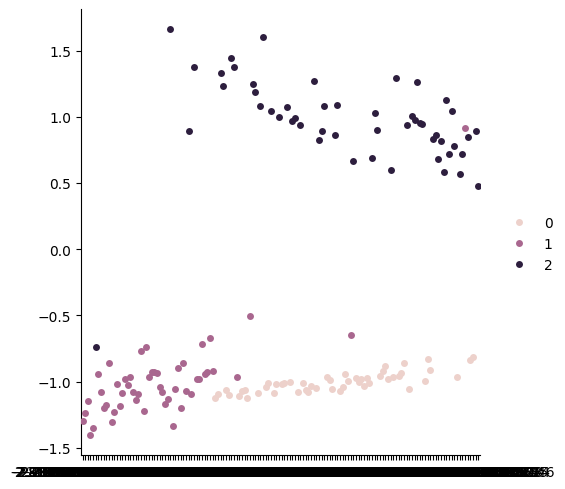

In [114]:
sns.catplot(x  = x[:,0],y = x[:,1],hue=y)

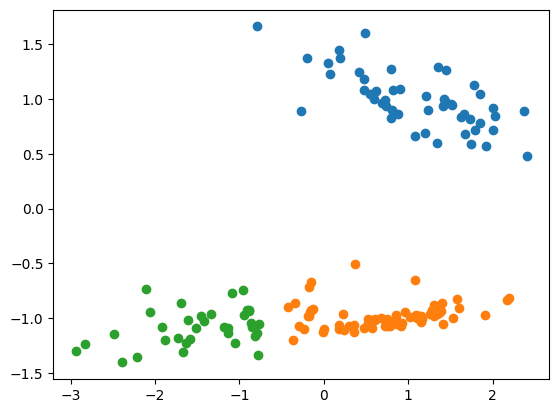

In [127]:
from numpy import unique
from numpy import where

clusters = unique(y)

model3 = AgglomerativeClustering(n_clusters=3,linkage='average')
model3.fit(x)
label  = model3.labels_

for cluster in clusters:
  index  = where(cluster==label)
  plt.scatter(x = x[index,0], y=x[index,1])

In [128]:
.00\\

SyntaxError: unexpected character after line continuation character (<ipython-input-128-78f9d5f5b3a0>, line 1)

In [128]:
|\\\\\\\\\\\\\\\\\\\\\\




